In [6]:
import numpy as np
import time
import random 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [7]:
def partial_sum(cum_a, m, n):
    #if m >= n:
        #raise Exception("ERROR, wrong parameters: m >= n ")
     #   pass
    # print("cumsum \n", cum_a)
    # Inclusion-Exclusion principle for n = 1 dimension
    return cum_a[n] -cum_a[m]

In [8]:
def simple_partial_sum(array,m,n):
    #if m >= n:
     #   raise Exception("ERROR, wrong parameters: m >= n ")
    # made needed slice from array and summed it
    res = np.sum(array[m:n])
    return res


In [9]:
def adding_zeros(cum_a):
    """
    returns cum_a with added zero rows and columns in order to exclude special cases( for example: m == 0, n == 0, and so on) 
    """
    return np.pad(cum_a, (1,0), 'constant', constant_values=0)

In [19]:
example_1 = np.random.randint(0, 10**6, (10**6))
cum_example_1 = adding_zeros(np.random.randint(0, 10**6, (10**6)).cumsum(axis=0))

# Рахуємо границі

In [11]:

dliny_masivov = list(range(10**2, 10**4,99 )) #99
granytsi = []   # масив границь (для кожної довжини 10 границь)
s = []          # кожен елемент s це 10 границь однаковоъ довжини
for i in range(0,len(dliny_masivov)):
    granytsi = []
    for k in range(0,10000):
        v = random.randint(0,(len(cum_example_1) - dliny_masivov[i]) )
        granytsi.append([v,v+dliny_masivov[i]])
    s.append(granytsi)

# Заміряємо час

In [22]:
y = []
y_g = []
y_std = []
for i in range(0, len(dliny_masivov)):  # йдемо по всіх довжинах
    y=[]        
    for j in range(0,1000): # йдемо по границях однакового розміру
        a = time.time()
        for k in range(0,10000): # заміряємо час для кожної з 10 границь по 100 разів
            partial_sum(cum_example_1, s[i][k][0], s[i][k][1])
        b = time.time()
        y.append(b-a)
    print(i)
    y_g.append(np.mean(y))  # усереднюэмо по кожній довжині границь (тобто час для кожних 10 підмасивів)
    y_std.append(np.std(y)) # корінь дисперсії 

C:\Users\max\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in int_scalars
  import sys


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


# Будуємо графік

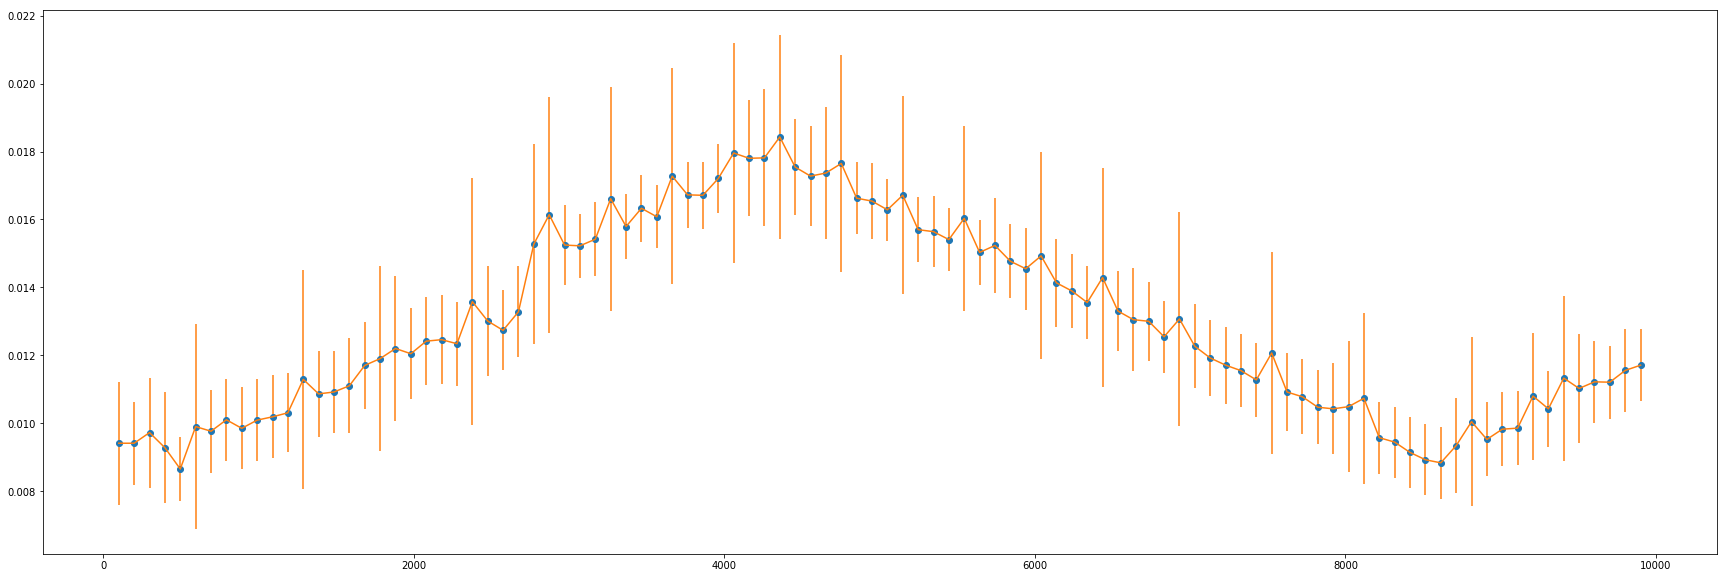

In [23]:
figure(figsize=(30, 10))
#matplotlib inline

plt.plot(dliny_masivov,y_g, "o")
yerr = y_std

plt.errorbar( dliny_masivov, y_g, yerr=yerr,label='both limits (default)')
plt.show()

# Заміряємо час для numpy

In [20]:
y = []
y_g = []
y_std = []
for i in range(0, len(dliny_masivov)):  # йдемо по всіх довжинах
    y=[]        
    for j in range(0,100): # йдемо по границях однакового розміру
        a = time.time()
        for k in range(0,10000): # заміряємо час для кожної з 10 границь по 100 разів
            simple_partial_sum(example_1, s[i][k][0], s[i][k][1])
        b = time.time()
        y.append(b-a)
    print(i)
    y_g.append(np.mean(y))  # усереднюэмо по кожній довжині границь (тобто час для кожних 10 підмасивів)
    y_std.append(np.std(y)) # корінь дисперсії 

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


# Будуємо графік для numpy

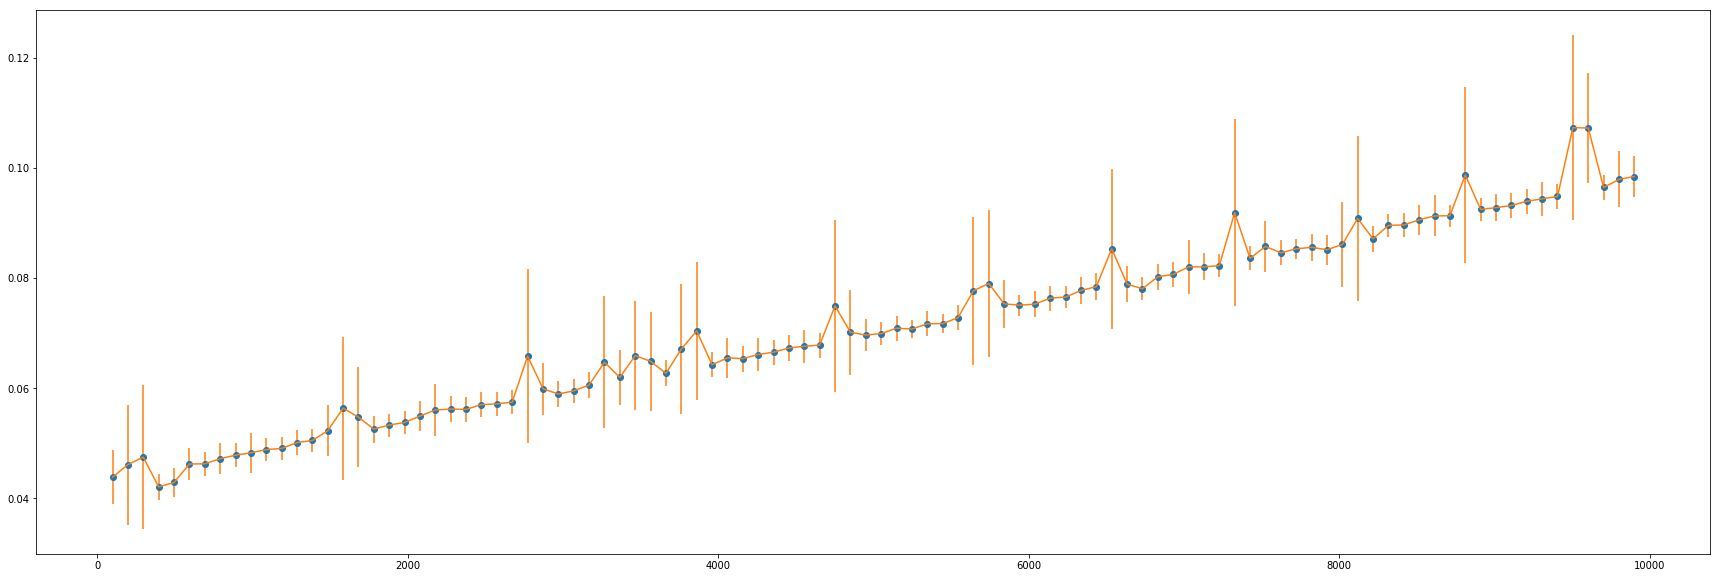

In [21]:
from matplotlib.pyplot import figure
figure(figsize=(30, 10))
#matplotlib inline


plt.plot(dliny_masivov,y_g, "o")
yerr = y_std

plt.errorbar( dliny_masivov, y_g, yerr=yerr,label='both limits (default)')
plt.show()